In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

from sklearn import set_config
set_config(print_changed_only=False)


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score,f1_score,accuracy_score

In [102]:
df = pd.read_csv('insurance_clean2.csv',index_col=0)

In [103]:
pd.set_option('display.max_columns', 500)

In [104]:
df.head()

,Age,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,PrevAttempts,Outcome,CarInsurance,Duration,age_group,duration_status,Month,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed
0,32,0,3,0,0,1,0,0,28,jan,2,0,0,0,70.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,32,1,2,0,0,1,0,1,26,may,5,0,0,0,185.0,1,0,5,0,0,1,0,0,0,0,0,0,0,0,0
2,29,0,3,0,0,1,0,1,3,jun,1,1,0,1,340.0,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0
3,25,0,2,0,0,1,0,1,11,may,2,0,0,1,819.0,0,1,5,0,0,0,0,0,0,0,0,0,1,0,0
4,30,1,3,0,1,0,0,1,3,jun,1,0,0,0,192.0,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0


In [105]:
df.drop('Duration',axis=1,inplace=True)

In [106]:
df.head()

,Age,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,PrevAttempts,Outcome,CarInsurance,age_group,duration_status,Month,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed
0,32,0,3,0,0,1,0,0,28,jan,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,32,1,2,0,0,1,0,1,26,may,5,0,0,0,1,0,5,0,0,1,0,0,0,0,0,0,0,0,0
2,29,0,3,0,0,1,0,1,3,jun,1,1,0,1,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0
3,25,0,2,0,0,1,0,1,11,may,2,0,0,1,0,1,5,0,0,0,0,0,0,0,0,0,1,0,0
4,30,1,3,0,1,0,0,1,3,jun,1,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0


In [107]:
df.isnull().sum()

Age                  0
Marital              0
Education            0
Default              0
Balance              0
HHInsurance          0
CarLoan              0
Communication        0
LastContactDay       0
LastContactMonth     0
NoOfContacts         0
PrevAttempts         0
Outcome              0
CarInsurance         0
age_group            0
duration_status      0
Month                0
Job_None             0
Job_admin.           0
Job_blue-collar      0
Job_entrepreneur     0
Job_housemaid        0
Job_management       0
Job_retired          0
Job_self-employed    0
Job_services         0
Job_student          0
Job_technician       0
Job_unemployed       0
dtype: int64

In [83]:
df.age_group.unique()

array([ 1.,  0.,  2.,  4.,  3., nan])

In [115]:
df.head()

,Age,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,PrevAttempts,Outcome,CarInsurance,age_group,duration_status,Month,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed
0,32,0,3,0,0,1,0,0,28,jan,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,32,1,2,0,0,1,0,1,26,may,5,0,0,0,1,0,5,0,0,1,0,0,0,0,0,0,0,0,0
2,29,0,3,0,0,1,0,1,3,jun,1,1,0,1,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0
3,25,0,2,0,0,1,0,1,11,may,2,0,0,1,0,1,5,0,0,0,0,0,0,0,0,0,1,0,0
4,30,1,3,0,1,0,0,1,3,jun,1,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

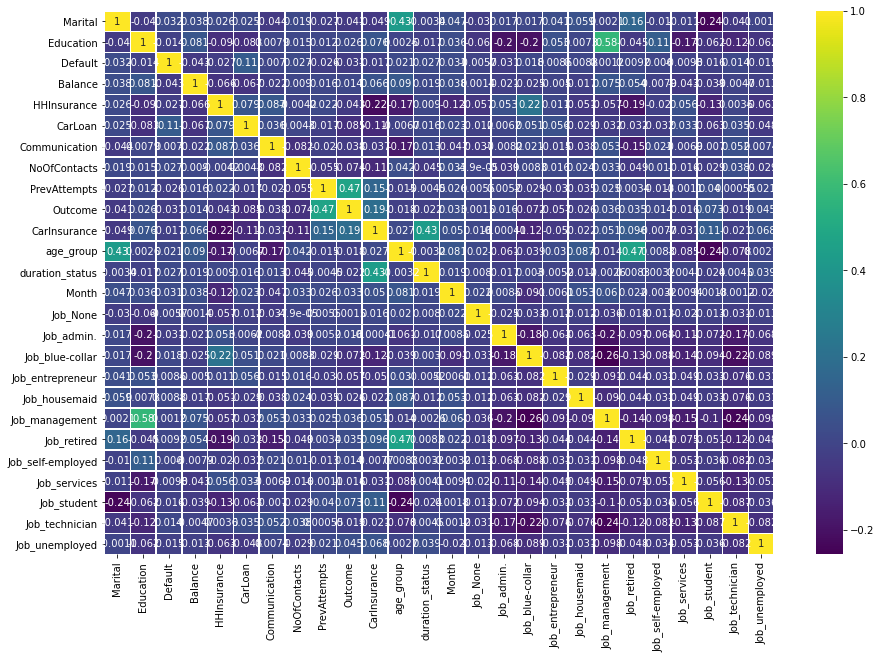

In [78]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr,cmap = 'viridis', annot= True, linewidth = 0.5)

In [57]:
num_top10_corr = df.corr()['CarInsurance'].sort_values(ascending=False).head(20).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

,CarInsurance
CarInsurance,1.000000
duration_status,0.432325
Outcome,0.188726
PrevAttempts,0.147538
Job_student,0.106416
Job_retired,0.095916
Education,0.076231
Job_unemployed,0.068376
Balance,0.066253
Job_management,0.050912


In [27]:
## SPLITTING

In [117]:
df.drop(['Age','LastContactDay','LastContactMonth','LastContactDay'],axis=1,inplace=True)

In [128]:
X= df.drop(['CarInsurance'],axis=1)
y= df['CarInsurance']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)

In [130]:
X_train.shape,X_test.shape

((2580, 25), (646, 25))

# LOGISTIC REGRESSION

In [131]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
LR_train_pred = LR_model.predict(X_train)
LR_test_pred = LR_model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train,LR_train_pred)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,LR_test_pred)*100))

Train Set Accuracy:75.3875968992248
Test Set Accuracy:74.14860681114551


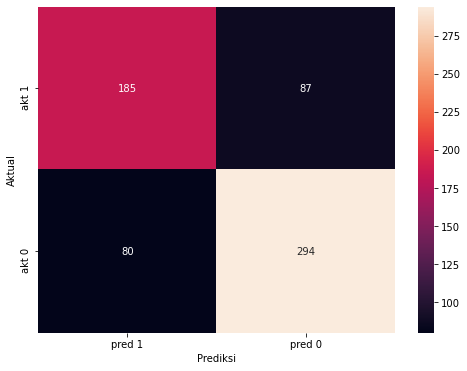

In [141]:
cm_LR = confusion_matrix(y_test, LR_test_pred, labels=[1,0])
df_LR = pd.DataFrame(data=cm_LR, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_LR, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# RANDOM FOREST BASE

In [136]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
RF_train_pred = RF_model.predict(X_train)
RF_test_pred = RF_model.predict(X_test)
RF_cm = confusion_matrix(y_test, RF_test_pred)


print("Train Set Accuracy:"+str(accuracy_score(y_train,RF_train_pred)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,RF_test_pred)*100))
print(classification_report(y_test, RF_test_pred))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test,RF_test_pred))

Train Set Accuracy:98.91472868217053
Test Set Accuracy:75.85139318885449
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       374
           1       0.70      0.75      0.72       272

    accuracy                           0.76       646
   macro avg       0.75      0.76      0.75       646
weighted avg       0.76      0.76      0.76       646


Confusion Matrix:
[[287  87]
 [ 69 203]]


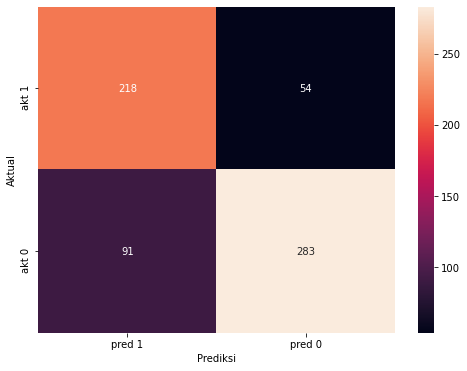

In [157]:
cm_RF = confusion_matrix(y_test, RF_test_pred, labels=[1,0])
df_RF = pd.DataFrame(data=cm_LR, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_LR, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

In [139]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)
XGB_train_pred = XGB_model.predict(X_train)
XGB_test_pred = XGB_model.predict(X_test)
XGB_cm = confusion_matrix(y_test, XGB_test_pred)


print("Train Set Accuracy:"+str(accuracy_score(y_train,XGB_train_pred)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,XGB_test_pred)*100))
print(classification_report(y_test, XGB_test_pred))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test,XGB_test_pred))

Train Set Accuracy:81.86046511627907
Test Set Accuracy:77.55417956656346
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       374
           1       0.71      0.80      0.75       272

    accuracy                           0.78       646
   macro avg       0.77      0.78      0.77       646
weighted avg       0.78      0.78      0.78       646


Confusion Matrix:
[[283  91]
 [ 54 218]]


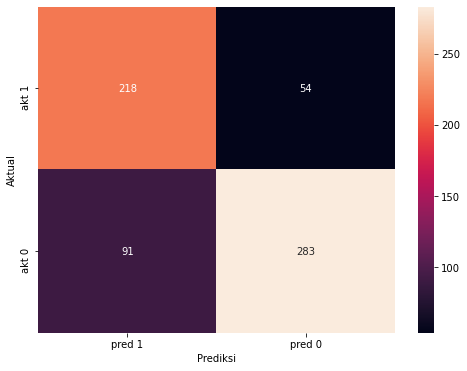

In [159]:
cm_XGB = confusion_matrix(y_test, XGB_test_pred, labels=[1,0])
df_XGB = pd.DataFrame(data=cm_LR, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_LR, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

## HYPER PARAMETER TUNING

In [147]:
## LOGISTIC

In [144]:
LR = LogisticRegression()

In [145]:
param_LR = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'max_iter': [100,200,1000],
            'C': [1],
            'tol': [0.0001,0.0005]
           }

In [146]:
Tune_LR = GridSearchCV(LR, param_grid=param_LR, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
Tune_LR.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1], 'max_iter': [100, 200, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.0001, 0.0005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [149]:
Tune_LR.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       374
           1       0.70      0.68      0.69       272

    accuracy                           0.74       646
   macro avg       0.73      0.73      0.73       646
weighted avg       0.74      0.74      0.74       646



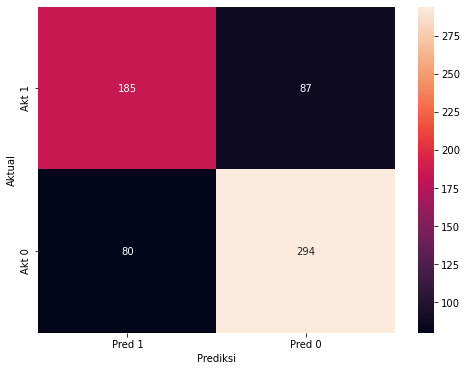

In [164]:
model_Tune_LR = Tune_LR.best_estimator_
y_tuned_lr = model_Tune_LR.predict(X_test)
cm_tuned_lr = confusion_matrix(y_test, y_tuned_lr, labels=[1,0])
df_tuned_lr = pd.DataFrame(data=cm_tuned_lr, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_lr));
sns.heatmap(df_tune_lr, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# Random Forest  Tuning


In [151]:
RF_tuned = RandomForestClassifier()
param_RF = {'n_estimators': [100,2000,5000],
            'max_depth': [None,5,7,8],
            'min_samples_split': [2,10,20],
            'max_features': ['auto',5],
           }

In [155]:
model_RF = RandomizedSearchCV(RF_tuned, param_distributions=param_RF, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
model_RF.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [163]:
y_tuned_rf_train = model_tuned_RF.predict(X_train)
print(accuracy_score(y_train, y_tune_rf_train))
print(accuracy_score(y_test, y_tune_rf))

NameError: name 'model_tuned_RF' is not defined